In [79]:
import pandas as pd
import numpy  
import string
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 


In [80]:
# Importando todo NLTK
import nltk
import re
# Tambien se puede importar modulos
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer

#Downloading NLP corpus from NLTK 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\helen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\helen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
seriestv = pd.read_csv("tablas_series_tv.csv",sep=";")

In [82]:
df=seriestv.copy()

In [83]:
df.drop(['Unnamed: 0','Titulo'],axis=1, inplace=True)

In [84]:
df.head()

,Sinopsis,Genero
0,\r\nVis a vis es una producción de Globomedia ...,"Drama, Suspense"
1,\r\nThe Good Doctor se centra en un joven y br...,"Drama, Médico"
2,\r\n'Los 100' es un drama post apocalíptico es...,"Aventura, Drama, Ciencia ficción"
3,\r\n \r\n Al mismo tiempo que ...,"Drama, Suspense"
4,"\r\nEste nuevo drama histórico, dirigido por M...","Aventura, Drama, Histórico"


In [85]:
# Stop words = Creacion de un conjunto unico desde el listado de stopwords en ingles que viene con el paquete NLTK. 

stop = set(stopwords.words('spanish'))

# Idem punto anterior, se excluyen signos de puntuacion 

exclude = set(string.punctuation) 

# Lemmatizacion de las palabras 
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized


In [86]:
from nltk.corpus import stopwords
stopWordList=stopwords.words('spanish')
stopWordList.remove('no')
stopWordList.remove('en')
def removeTags(data):
    soup=BeautifulSoup(df.Sinopsis,'html.parser')
    text=soup.get_text()
    return text
import unicodedata

In [87]:
def removeAscendingChar(data):
    data=unicodedata.normalize('NFKD', data).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return data

In [88]:
df['Sinopsis']= df['Sinopsis'].apply(lambda x: re.sub(r'([^\s\w]|_)+', '', x))
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import ToktokTokenizer
lemma=WordNetLemmatizer()
token=ToktokTokenizer()

def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
    x=lemma.lemmatize(w,'v')
    listLemma.append(x)
    return text
def stopWordsRemove(text):
    wordList=[x.lower().strip() for x in token.tokenize(text)]
    removedList=[x for x in wordList if not x in stopWordList]
    text=''.join(removedList)
    return text

In [89]:
def PreProcessing(text):
    text=removeTags(text)
    
    text=removeAscendingChar(text)

    return(text)

In [90]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib3

In [91]:
def clean_text(text):
    text = re.sub('\r\n', ' ', text)
    text = re.sub('The', 'la', text)
    text = re.sub('the', 'el', text)
    text = re.sub('drama', ' ', text)
    text = re.sub('suspense', ' ', text)
    text = re.sub('dramática', ' ', text)
    text = re.sub('dibujos', ' ', text)
    text = re.sub('dibujo', ' ', text)
    text = re.sub('dorama', ' ', text)
    text = re.sub('fantasía', ' ', text)
    text = re.sub('histórico', ' ', text)
    text = re.sub('western', ' ', text)
    text = re.sub('serie', ' ', text)
    text = re.sub('series', ' ', text)
    return text


In [92]:
df['Sinopsis'] = df['Sinopsis'].map(lambda com : clean_text(com))


In [93]:
df.head()

,Sinopsis,Genero
0,Vis a vis es una producción de Globomedia par...,"Drama, Suspense"
1,la Good Doctor se centra en un joven y brilla...,"Drama, Médico"
2,Los 100 es un post apocalíptico escrito por...,"Aventura, Drama, Ciencia ficción"
3,Al mismo tiempo que un nue...,"Drama, Suspense"
4,Este nuevo dirigido por Michael Hirst Eli...,"Aventura, Drama, Histórico"


In [94]:
df['Sinopsis'] = df['Sinopsis'].map(lambda com : clean(com))

In [166]:
df.head(12)

,Sinopsis,Genero
0,vi vi producción globomedia antena 3 pretende ...,"Drama, Suspense"
1,good doctor centrum joven brillante cirujano p...,"Drama, Médico"
2,100 post apocalíptico escrito jason roelnberg ...,"Aventura, Drama, Ciencia ficción"
3,mismo tiempo nuevo año escolar da comienzo ciu...,"Drama, Suspense"
4,nuevo dirigido michael hirst elizabeth tudor h...,"Aventura, Drama, Histórico"
5,historia lucifer conocemos ángel caído cielo e...,"Drama, Fantasía, Crimen"
6,meredith grey ellen pompeo daredevil compromis...,"Drama, Médico"
7,historia traslada escenario postpandémico viru...,"Drama, Terror"
8,joven misteriosa llamada ryn aparece pueblo co...,"Drama, Fantasía"
9,hbo calidad caracteriza cadena brinda vez magi...,"Drama, Fantasía"


In [96]:
df.iloc[287,0]

'historia centrum bea smith entra cárcel tras ser acusada intento asesinato marido bea separa hija enviada wentworth prisión preventiva vive esperando ser condenada allí ve obligada aprender cómo funcionan cosas dentro prisión conocer quién manda realmentewenworth televisión australiana emitió primera vez soho 1 mayo 2013 reinvención prisoner desarrollada 1979 1986 lara radulovich david hannam desarrollaron idea original reg watson ambientada época actual protagonizada danielle cormackestá rodada construcción suburbio clayton victoria recibido críticas positivas primer episodio convirtió episodio visto historia foxtel australia'

In [97]:
lista = [sublista.split(', ') for sublista in df.Genero]
lista[:10]

[['Drama', 'Suspense'],
 ['Drama', 'Médico'],
 ['Aventura', 'Drama', 'Ciencia ficción'],
 ['Drama', 'Suspense'],
 ['Aventura', 'Drama', 'Histórico'],
 ['Drama', 'Fantasía', 'Crimen'],
 ['Drama', 'Médico'],
 ['Drama', 'Terror'],
 ['Drama', 'Fantasía'],
 ['Drama', 'Fantasía']]

In [98]:
len(lista)

3675

In [99]:
genres = sorted(set([item for s in lista for item in s]))
genres

['Acción',
 'Animación',
 'Artes Marciales',
 'Aventura',
 'Biografía',
 'Ciencia ficción',
 'Clásico',
 'Comedia',
 'Comedia dramática',
 'Comedia musical',
 'Crimen',
 'Deporte',
 'Desconocido',
 'Dibujos animados',
 'Documental',
 'Doramas',
 'Drama',
 'Erótico',
 'Espionaje',
 'Familia',
 'Fantasía',
 'Guerra',
 'Histórico',
 'Judicial',
 'Musical',
 'Médico',
 'Romántico',
 'Show',
 'Suspense',
 'Teleserie',
 'Terror',
 'Webisode',
 'Western',
 'Épico']

In [100]:
genre_dict = {1:"1: Acción", 
            2:"2: Animación",
            3:"3: Artes Marciales",
            4:"4: Aventura",
            5:"5: Biografía",
            6:"6: Ciencia ficción",
            7:"7: Clásico",
            8:"8: Comedia",
            9:"9: Comedia dramática",
            10:"10: Comedia musical",
            11:"11: Crimen",
            12:"12: Deporte",
            13:"13: Desconocido",
            14:"14: Documental",
            15:"15: Doramas",
            16:"16: Drama",
            17:"17: Erótico",
            18:"18: Espionaje",
            19:"19: Familia",20:"20: Fantasía",
            21:"21: Guerra",
            22:"22: Histórico",
            23:"23: Judicial",24:"24: Musical",
            25:"25: Médico",26:"26: Romántico",
            27:"27: Show",28:"28: Suspense",
            29:"29: Teleserie",
            30:"30: Terror",31:"31: Webisode",
            32:"32: Western",33:"33: Épico"}

In [101]:
# Creamos un DataFrame vacío para asociar los géneros correspondientes a cada película
dummies = pd.DataFrame(np.zeros((len(df), len(genres)), dtype=int), columns=genres)
dummies.head()

,Acción,Animación,Artes Marciales,Aventura,Biografía,Ciencia ficción,Clásico,Comedia,Comedia dramática,Comedia musical,...,Musical,Médico,Romántico,Show,Suspense,Teleserie,Terror,Webisode,Western,Épico
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
# Codifica las categorías como dummies. Escribe un 1 donde corresponde
for i, gen in enumerate(df.Genero):
    dummies.loc[i, gen.split(', ')] = 1

In [103]:
dummies.head()

,Acción,Animación,Artes Marciales,Aventura,Biografía,Ciencia ficción,Clásico,Comedia,Comedia dramática,Comedia musical,...,Musical,Médico,Romántico,Show,Suspense,Teleserie,Terror,Webisode,Western,Épico
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
series_df = df.join(dummies.add_prefix('Genre_'))
series_df.head()

,Sinopsis,Genero,Genre_Acción,Genre_Animación,Genre_Artes Marciales,Genre_Aventura,Genre_Biografía,Genre_Ciencia ficción,Genre_Clásico,Genre_Comedia,...,Genre_Musical,Genre_Médico,Genre_Romántico,Genre_Show,Genre_Suspense,Genre_Teleserie,Genre_Terror,Genre_Webisode,Genre_Western,Genre_Épico
0,vi vi producción globomedia antena 3 pretende ...,"Drama, Suspense",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,good doctor centrum joven brillante cirujano p...,"Drama, Médico",0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,100 post apocalíptico escrito jason roelnberg ...,"Aventura, Drama, Ciencia ficción",0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,mismo tiempo nuevo año escolar da comienzo ciu...,"Drama, Suspense",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,nuevo dirigido michael hirst elizabeth tudor h...,"Aventura, Drama, Histórico",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:

# tf-idf for text features, tokenizing with nltk. To improve performance, lemmatize (or stem) and tune max_df

# El metodo CountVectorizer de sklearn hace todo el preprocesamiento junto, stopwords, lowercase;tokenizacion usando regex
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=5, max_df=0.9, 
                             stop_words=stop, lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
X= vectorizer.fit_transform(series_df.Sinopsis)

y = dummies


In [106]:
from sklearn.preprocessing import MultiLabelBinarizer
g = lista
mlb = MultiLabelBinarizer()
g = mlb.fit_transform(g)

In [107]:
import seaborn as sns


plt.figure(figsize=(15, 6))
plt.xticks(rotation=80, fontsize  = 15)
plt.title('Distribution of Genres in Dataset' , fontsize = 15)
plt.ylabel('Number of Examples', fontsize = 15)
plt.xlabel('Genre', fontsize = 15)
sns.barplot([genre_dict[i] for i in list(mlb.classes_)], y.sum(axis=0))

In [108]:
mlb.classes_

array(['Acción', 'Animación', 'Artes Marciales', 'Aventura', 'Biografía',
       'Ciencia ficción', 'Clásico', 'Comedia', 'Comedia dramática',
       'Comedia musical', 'Crimen', 'Deporte', 'Desconocido',
       'Dibujos animados', 'Documental', 'Doramas', 'Drama', 'Erótico',
       'Espionaje', 'Familia', 'Fantasía', 'Guerra', 'Histórico',
       'Judicial', 'Musical', 'Médico', 'Romántico', 'Show', 'Suspense',
       'Teleserie', 'Terror', 'Webisode', 'Western', 'Épico'],
      dtype=object)

In [109]:
g[4]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [110]:
list(mlb.classes_)

['Acción',
 'Animación',
 'Artes Marciales',
 'Aventura',
 'Biografía',
 'Ciencia ficción',
 'Clásico',
 'Comedia',
 'Comedia dramática',
 'Comedia musical',
 'Crimen',
 'Deporte',
 'Desconocido',
 'Dibujos animados',
 'Documental',
 'Doramas',
 'Drama',
 'Erótico',
 'Espionaje',
 'Familia',
 'Fantasía',
 'Guerra',
 'Histórico',
 'Judicial',
 'Musical',
 'Médico',
 'Romántico',
 'Show',
 'Suspense',
 'Teleserie',
 'Terror',
 'Webisode',
 'Western',
 'Épico']

In [111]:
genre_dict[2]

'2: Animación'

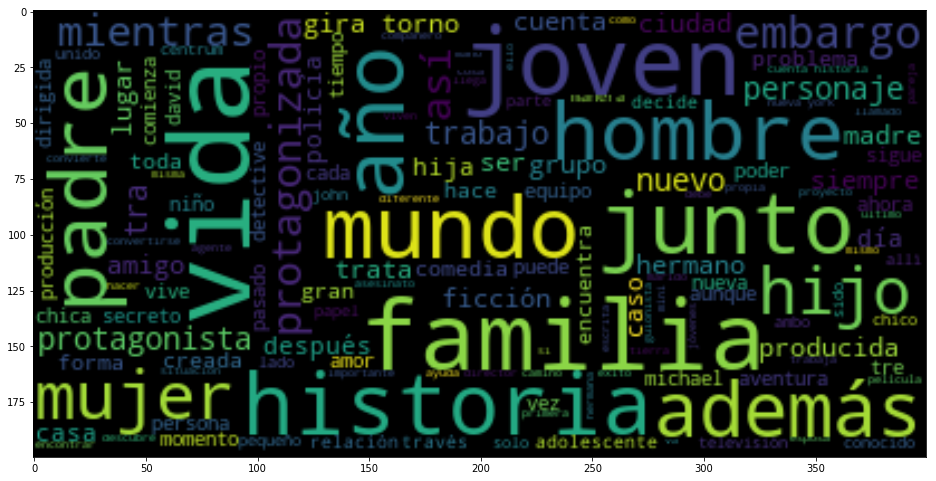

In [112]:
totalText=''
for x in series_df['Sinopsis']:
    ps=clean(x)
    totalText=totalText+' '+ps
from wordcloud import WordCloud
wc=WordCloud(background_color='black',max_font_size=50).generate(totalText)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation='bilinear')

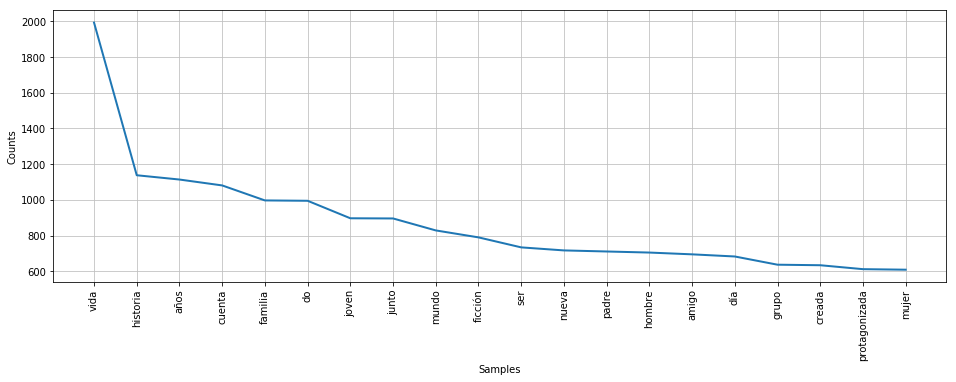

In [113]:
import nltk
from nltk.tokenize import ToktokTokenizer
x=nltk.FreqDist(ToktokTokenizer().tokenize(totalText))
plt.figure(figsize=(16,5))
x.plot(20)

In [114]:
# using binary relevance
import pandas as DataFrame
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

In [115]:
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

In [116]:
#X=series_df['Sinopsis']

In [117]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)

In [118]:
# train
classifier.fit(Xtrain, ytrain)
# predict
predictions = classifier.predict(Xtest)
print(predictions.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [119]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predictions,
                            target_names=genres))

                   precision    recall  f1-score   support

           Acción       0.13      0.02      0.03       106
        Animación       0.50      0.11      0.19       158
  Artes Marciales       0.00      0.00      0.00         4
         Aventura       0.22      0.03      0.05        73
        Biografía       0.00      0.00      0.00        18
  Ciencia ficción       0.08      0.01      0.02        83
          Clásico       0.00      0.00      0.00         1
          Comedia       0.53      0.27      0.36       373
Comedia dramática       0.00      0.00      0.00        31
  Comedia musical       0.00      0.00      0.00         5
           Crimen       0.27      0.05      0.08       145
          Deporte       0.00      0.00      0.00         5
      Desconocido       0.00      0.00      0.00         5
 Dibujos animados       0.00      0.00      0.00         9
       Documental       0.00      0.00      0.00        22
          Doramas       0.00      0.00      0.00       

C:\Users\helen\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [120]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [121]:
# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier use any other classifier if u wish
#classifier = ClassifierChain(GaussianNB())
classifier = ClassifierChain(DecisionTreeClassifier())
# train
classifier.fit(Xtrain, ytrain)

ClassifierChain(classifier=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
        require_dense=[True, True])

In [122]:
# predict
predictions = classifier.predict(Xtest)


In [123]:
print(classification_report(ytest,predictions,
                            target_names=genres))

                   precision    recall  f1-score   support

           Acción       0.18      0.18      0.18       106
        Animación       0.64      0.75      0.69       158
  Artes Marciales       0.00      0.00      0.00         4
         Aventura       0.13      0.14      0.13        73
        Biografía       0.30      0.39      0.34        18
  Ciencia ficción       0.39      0.48      0.43        83
          Clásico       0.00      0.00      0.00         1
          Comedia       0.60      0.57      0.59       373
Comedia dramática       0.04      0.03      0.04        31
  Comedia musical       0.17      0.20      0.18         5
           Crimen       0.48      0.43      0.45       145
          Deporte       0.00      0.00      0.00         5
      Desconocido       0.00      0.00      0.00         5
 Dibujos animados       0.00      0.00      0.00         9
       Documental       0.76      0.73      0.74        22
          Doramas       0.00      0.00      0.00       

C:\Users\helen\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [124]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier = LabelPowerset(GaussianNB())
#OR
#classifier = ClassifierChain(DecisionTreeClassifier())
# train
classifier.fit(Xtrain, ytrain)
# predict
predictions = classifier.predict(Xtest)

In [125]:
print(classification_report(ytest,predictions,
                            target_names=genres))

                   precision    recall  f1-score   support

           Acción       0.00      0.00      0.00       106
        Animación       0.77      0.35      0.48       158
  Artes Marciales       0.00      0.00      0.00         4
         Aventura       0.00      0.00      0.00        73
        Biografía       0.00      0.00      0.00        18
  Ciencia ficción       0.00      0.00      0.00        83
          Clásico       0.00      0.00      0.00         1
          Comedia       0.48      0.67      0.56       373
Comedia dramática       0.00      0.00      0.00        31
  Comedia musical       0.00      0.00      0.00         5
           Crimen       0.55      0.08      0.14       145
          Deporte       0.00      0.00      0.00         5
      Desconocido       0.00      0.00      0.00         5
 Dibujos animados       0.00      0.00      0.00         9
       Documental       0.00      0.00      0.00        22
          Doramas       0.00      0.00      0.00       

C:\Users\helen\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


from skmultilearn.adapt import MLkNN
classifier = MLkNN(k=15)
Xtrainm = Xtrain.as_matrix()
Xtrainm = np.matrix(Xtrainm)
ytrainm = ytrain.as_matrix()
ytrainm = np.matrix(ytrainm)
#data test
Xtestm = Xtest.as_matrix()
Xtestm = np.matrix(Xtestm)
ytestm = ytest.as_matrix()
ytestm = np.matrix(ytestm)
#class
classifier.fit(Xtrainm,ytrainm)
# predict
predictions = classifier.predict(Xtest)
print(predictions.toarray())
print(ytest)



In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y,predictions,average='micro'))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf=OneVsRestClassifier(MultinomialNB())
clf.fit(Xtrain, ytrain)
pred=clf.predict(x)


In [128]:
#df_genres = series_df.drop(['plot', 'title'], axis=1)
counts = []
categories = list(dummies.columns.values)
for i in categories:
    counts.append((i, dummies[i].sum()))
df_stats = pd.DataFrame(counts, columns=['genre', 'n_movies'])
df_stats

,genre,n_movies
0,Acción,321
1,Animación,504
2,Artes Marciales,8
3,Aventura,207
4,Biografía,65
5,Ciencia ficción,246
6,Clásico,1
7,Comedia,1049
8,Comedia dramática,90
9,Comedia musical,17


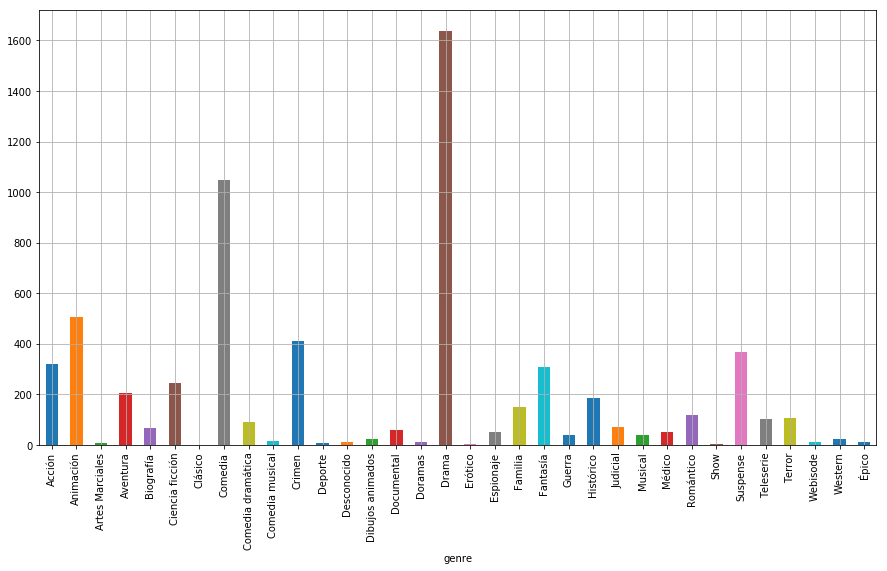

In [129]:
df_stats.plot(x='genre', y='n_movies', kind='bar', legend=False, grid=True, figsize=(15, 8));

In [155]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [140]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop)),
    ('clf', OneVsRestClassifier(LinearSVC())),
])


In [141]:
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    "clf__estimator__C": [0.01, 0.1, 1],
    "clf__estimator__class_weight": ['balanced', None],
}

In [ ]:
# Create word tokens
tokenized_words = ['genero', 'serie', 'drama', 'accion', 'aventuras', 'doramas', 'the', 'ciencia ficcion', 'and', 'historia','comedia','musical','crimen']

In [ ]:
def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]

In [144]:
ytest

,Acción,Animación,Artes Marciales,Aventura,Biografía,Ciencia ficción,Clásico,Comedia,Comedia dramática,Comedia musical,...,Musical,Médico,Romántico,Show,Suspense,Teleserie,Terror,Webisode,Western,Épico
2127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1744,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2868,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1691,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2266,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
mnb = OneVsRestClassifier(MultinomialNB())

svm = OneVsRestClassifier(LinearSVC())

In [157]:
classifiers = {'naive bayes' :mnb,  'svm': svm}

In [159]:
from sklearn.model_selection import cross_val_score

In [161]:
def get_scores(metric):
    scores = dict()
    for clf_name, clf in classifiers.items():
        start = time.time()
        score = cross_val_score(clf, X, y, scoring = metric, cv=7)
        end = time.time()
        print (clf_name + " took %f seconds" % (end-start))
        scores[clf_name] = score
          
    return pd.DataFrame(scores)

In [163]:
import time

C:\Users\helen\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 6 is present in all training examples.
  str(classes[c]))


naive bayes took 1.504978 seconds


C:\Users\helen\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 6 is present in all training examples.
  str(classes[c]))


svm took 12.012273 seconds


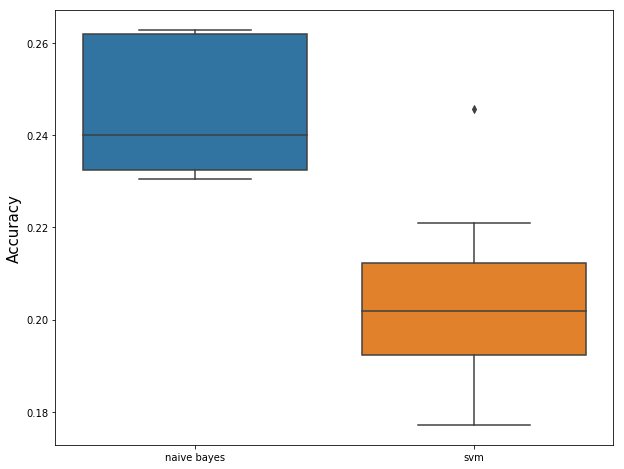

In [164]:
plt.figure(figsize=(10,8))
plt.ylabel('Accuracy', fontsize=15)
sns.boxplot(data=get_scores('accuracy'))

C:\Users\helen\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 6 is present in all training examples.
  str(classes[c]))


naive bayes took 1.531905 seconds


C:\Users\helen\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 6 is present in all training examples.
  str(classes[c]))


svm took 12.030851 seconds


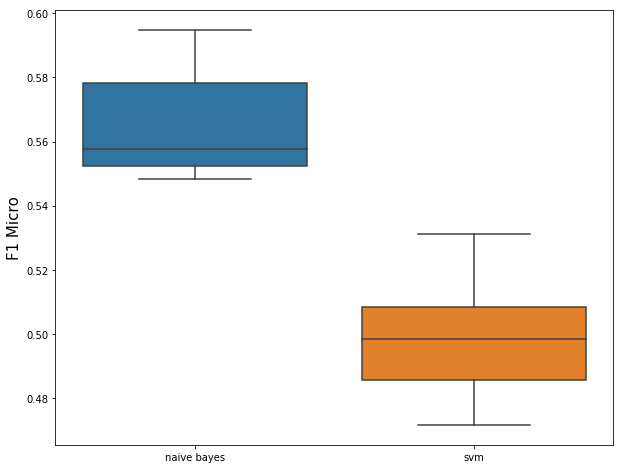

In [165]:
plt.figure(figsize=(10,8))
plt.ylabel('F1 Micro', fontsize=15)
sns.boxplot(data=get_scores('f1_micro'));

In [168]:
df_stats=df_stats.loc[df_stats['n_movies']>= 25]

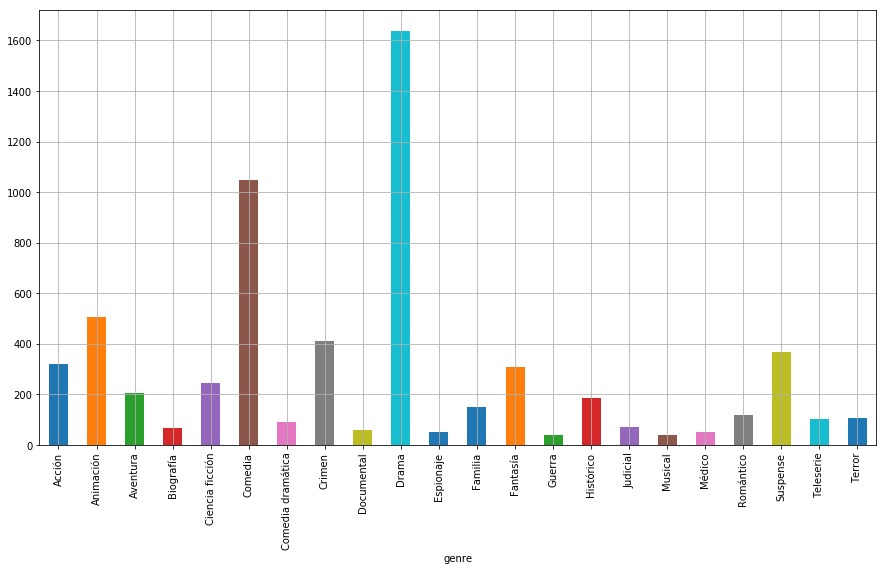

In [169]:
df_stats.plot(x='genre', y='n_movies', kind='bar', legend=False, grid=True, figsize=(15, 8));

In [170]:
df_stats.shape

(22, 2)

In [171]:
y.columns

Index(['Acción', 'Animación', 'Artes Marciales', 'Aventura', 'Biografía',
       'Ciencia ficción', 'Clásico', 'Comedia', 'Comedia dramática',
       'Comedia musical', 'Crimen', 'Deporte', 'Desconocido',
       'Dibujos animados', 'Documental', 'Doramas', 'Drama', 'Erótico',
       'Espionaje', 'Familia', 'Fantasía', 'Guerra', 'Histórico', 'Judicial',
       'Musical', 'Médico', 'Romántico', 'Show', 'Suspense', 'Teleserie',
       'Terror', 'Webisode', 'Western', 'Épico'],
      dtype='object')

In [172]:
y.drop(['Artes Marciales','Clásico','Comedia musical', 'Deporte', 'Desconocido','Dibujos animados','Doramas', 'Erótico','Show', 'Webisode', 'Western', 'Épico'],axis=1, inplace=True)

In [173]:
series_df.columns

Index(['Sinopsis', 'Genero', 'Genre_Acción', 'Genre_Animación',
       'Genre_Artes Marciales', 'Genre_Aventura', 'Genre_Biografía',
       'Genre_Ciencia ficción', 'Genre_Clásico', 'Genre_Comedia',
       'Genre_Comedia dramática', 'Genre_Comedia musical', 'Genre_Crimen',
       'Genre_Deporte', 'Genre_Desconocido', 'Genre_Dibujos animados',
       'Genre_Documental', 'Genre_Doramas', 'Genre_Drama', 'Genre_Erótico',
       'Genre_Espionaje', 'Genre_Familia', 'Genre_Fantasía', 'Genre_Guerra',
       'Genre_Histórico', 'Genre_Judicial', 'Genre_Musical', 'Genre_Médico',
       'Genre_Romántico', 'Genre_Show', 'Genre_Suspense', 'Genre_Teleserie',
       'Genre_Terror', 'Genre_Webisode', 'Genre_Western', 'Genre_Épico'],
      dtype='object')

In [174]:
series_df.drop(['Genre_Artes Marciales','Genre_Clásico','Genre_Comedia musical','Genre_Deporte','Genre_Desconocido','Genre_Dibujos animados','Genre_Doramas','Genre_Erótico','Genre_Show','Genre_Webisode','Genre_Western','Genre_Épico'],axis=1, inplace=True)

In [180]:
series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 24 columns):
Sinopsis                   3675 non-null object
Genero                     3675 non-null object
Genre_Acción               3675 non-null int32
Genre_Animación            3675 non-null int32
Genre_Aventura             3675 non-null int32
Genre_Biografía            3675 non-null int32
Genre_Ciencia ficción      3675 non-null int32
Genre_Comedia              3675 non-null int32
Genre_Comedia dramática    3675 non-null int32
Genre_Crimen               3675 non-null int32
Genre_Documental           3675 non-null int32
Genre_Drama                3675 non-null int32
Genre_Espionaje            3675 non-null int32
Genre_Familia              3675 non-null int32
Genre_Fantasía             3675 non-null int32
Genre_Guerra               3675 non-null int32
Genre_Histórico            3675 non-null int32
Genre_Judicial             3675 non-null int32
Genre_Musical              3675 non-null int3

In [183]:
series_df.groupby('Genero').sum()

,Genre_Acción,Genre_Animación,Genre_Aventura,Genre_Biografía,Genre_Ciencia ficción,Genre_Comedia,Genre_Comedia dramática,Genre_Crimen,Genre_Documental,Genre_Drama,...,Genre_Fantasía,Genre_Guerra,Genre_Histórico,Genre_Judicial,Genre_Musical,Genre_Médico,Genre_Romántico,Genre_Suspense,Genre_Teleserie,Genre_Terror
Genero,,,,,,,,,,,,,,,,,,,,,
Acción,29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Acción, Animación",10,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Acción, Teleserie",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
"Acción, Webisode",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Animación,0,237,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Animación, Familia",0,27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Animación, Familia, Musical",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
"Animación, Musical",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
"Animación, Webisode",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop('Lifestyle', axis=1, inplace=True)